# Kütüphaneler

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.plotting as pdplt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from warnings import filterwarnings
filterwarnings("ignore")

# Veri Analizi

In [2]:
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [6]:
df.describe(include = "object")

,Species
count,150
unique,3
top,Iris-virginica
freq,50


In [7]:
df["Species"].value_counts().to_frame()

,Species
Iris-virginica,50
Iris-versicolor,50
Iris-setosa,50


# Veri Görselleştirme

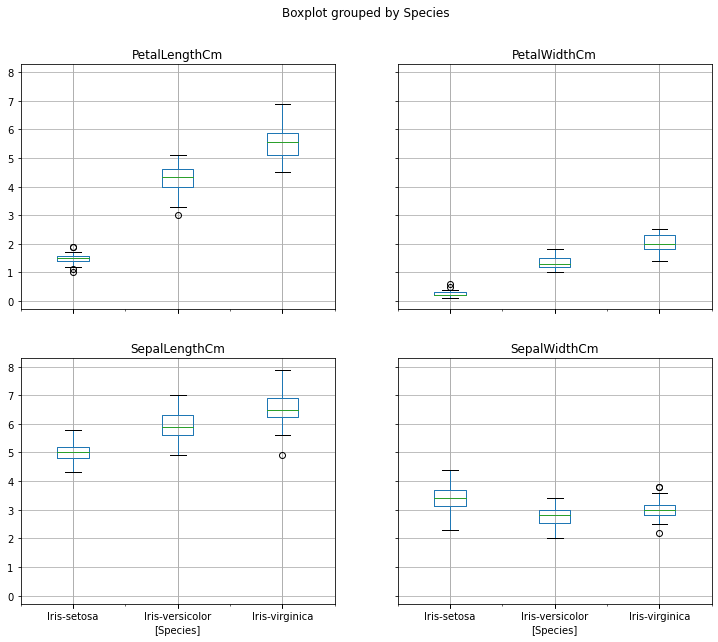

In [8]:
df.drop("Id", axis = 1).boxplot(by = "Species", figsize = (12,10));

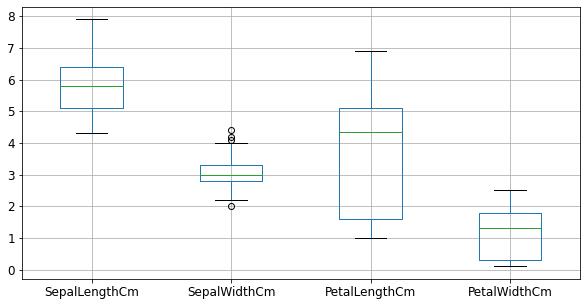

In [9]:
df.drop("Id", axis = 1).boxplot(fontsize = 12, figsize = (10,5));

In [10]:
df_Id = df["Id"]
df_versicolor = df[df["Species"] == "Iris-versicolor"]
df_virginica = df[df["Species"] == "Iris-virginica"]
df_setosa = df[df["Species"] == "Iris-setosa"]

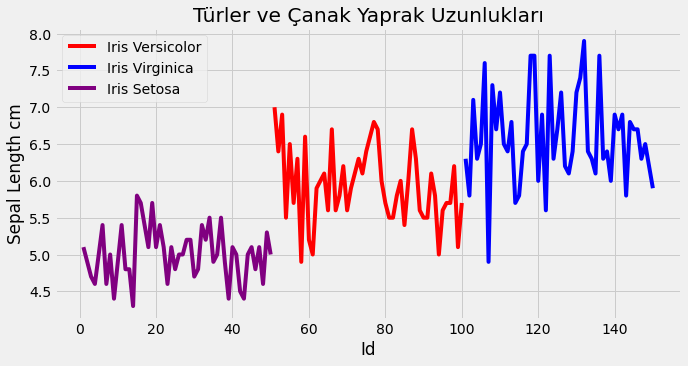

In [11]:
plt.style.use("fivethirtyeight")
plt.figure(figsize = (10,5))
plt.plot(df_versicolor["Id"], df_versicolor["SepalLengthCm"], color = "red", label = "Iris Versicolor")
plt.plot(df_virginica["Id"], df_virginica["SepalLengthCm"], color = "blue", label = "Iris Virginica")
plt.plot(df_setosa["Id"], df_setosa["SepalLengthCm"], color = "purple", label = "Iris Setosa")
plt.title("Türler ve Çanak Yaprak Uzunlukları")
plt.xlabel("Id")
plt.ylabel("Sepal Length cm")
plt.legend();

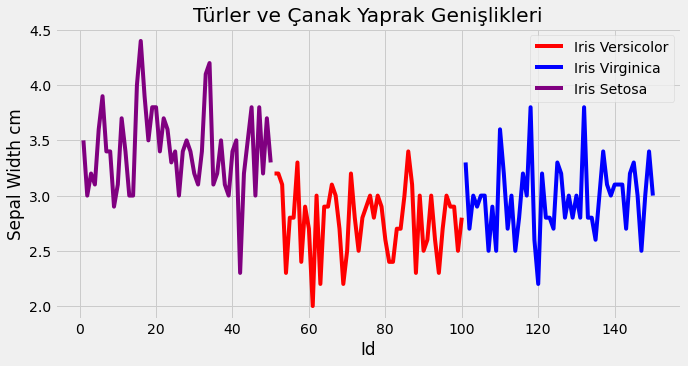

In [12]:
plt.figure(figsize = (10,5))
plt.plot(df_versicolor["Id"], df_versicolor["SepalWidthCm"], color = "red", label = "Iris Versicolor")
plt.plot(df_virginica["Id"], df_virginica["SepalWidthCm"], color = "blue", label = "Iris Virginica")
plt.plot(df_setosa["Id"], df_setosa["SepalWidthCm"], color = "purple", label = "Iris Setosa")
plt.title("Türler ve Çanak Yaprak Genişlikleri")
plt.xlabel("Id")
plt.ylabel("Sepal Width cm")
plt.legend();

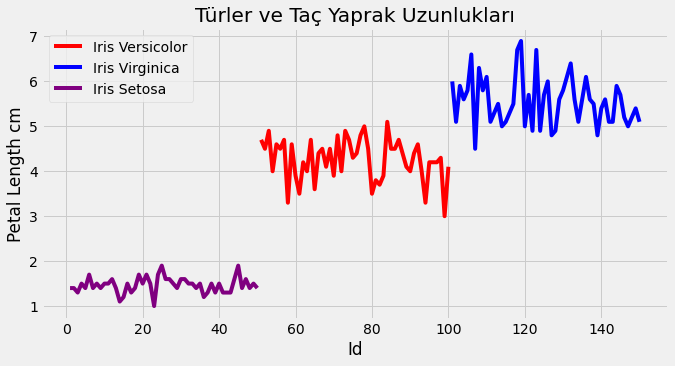

In [13]:
plt.figure(figsize = (10,5))
plt.plot(df_versicolor["Id"], df_versicolor["PetalLengthCm"], color = "red", label = "Iris Versicolor")
plt.plot(df_virginica["Id"], df_virginica["PetalLengthCm"], color = "blue", label = "Iris Virginica")
plt.plot(df_setosa["Id"], df_setosa["PetalLengthCm"], color = "purple", label = "Iris Setosa")
plt.title("Türler ve Taç Yaprak Uzunlukları")
plt.xlabel("Id")
plt.ylabel("Petal Length cm")
plt.legend();

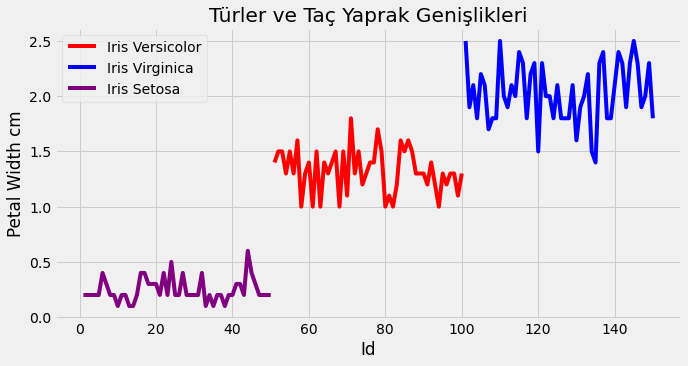

In [14]:
plt.figure(figsize = (10,5))
plt.plot(df_versicolor["Id"], df_versicolor["PetalWidthCm"], color = "red", label = "Iris Versicolor")
plt.plot(df_virginica["Id"], df_virginica["PetalWidthCm"], color = "blue", label = "Iris Virginica")
plt.plot(df_setosa["Id"], df_setosa["PetalWidthCm"], color = "purple", label = "Iris Setosa")
plt.title("Türler ve Taç Yaprak Genişlikleri")
plt.xlabel("Id")
plt.ylabel("Petal Width cm")
plt.legend();

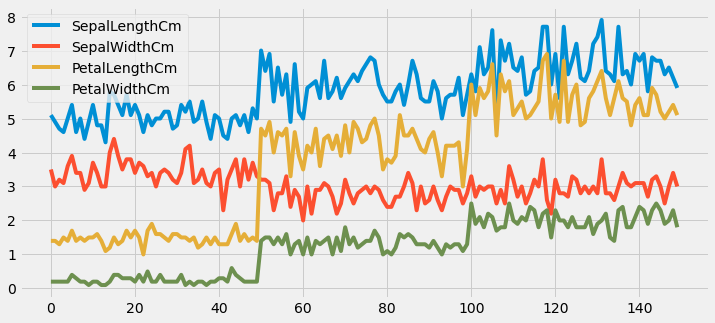

In [15]:
df.drop("Id", axis = 1).plot(grid = True, figsize = (11,5));

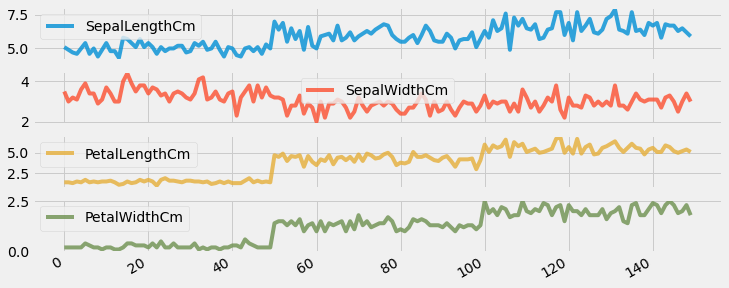

In [16]:
df.drop("Id", axis = 1).plot(grid = True, subplots = True, alpha = 0.8, figsize = (11,5));

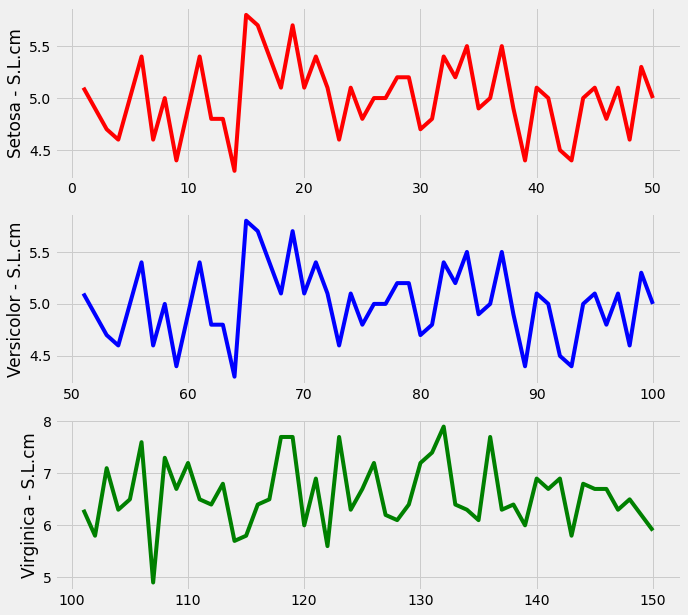

In [17]:
plt.figure(figsize = (10,10))
plt.subplot(3,1,1)
plt.plot(df_setosa["Id"], df_setosa["SepalLengthCm"], color = "red", label = "Iris Setosa")
plt.ylabel("Setosa - S.L.cm")
plt.subplot(3,1,2)
plt.plot(df_versicolor["Id"], df_setosa["SepalLengthCm"], color = "blue", label = "Iris Versicolor")
plt.ylabel("Versicolor - S.L.cm")
plt.subplot(3,1,3)
plt.plot(df_virginica["Id"], df_virginica["SepalLengthCm"], color = "green", label = "Iris Virginica")
plt.ylabel("Virginica - S.L.cm");

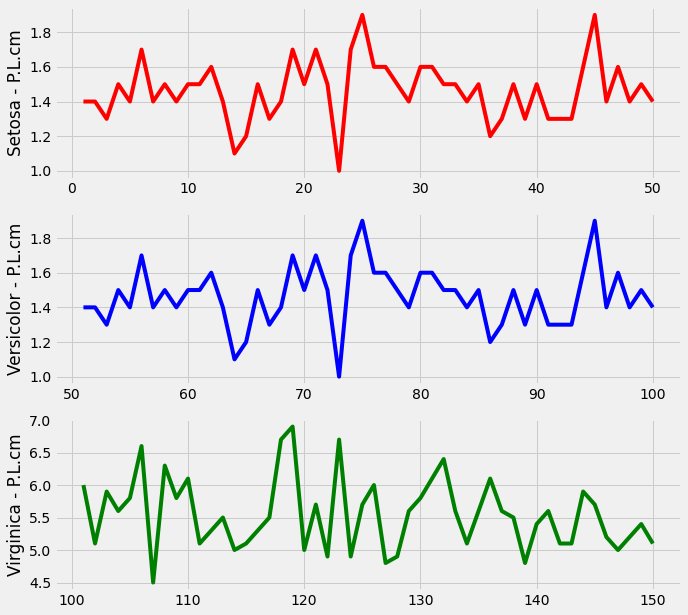

In [18]:
plt.figure(figsize = (10,10))
plt.subplot(3,1,1)
plt.plot(df_setosa["Id"], df_setosa["PetalLengthCm"], color = "red", label = "Iris Setosa")
plt.ylabel("Setosa - P.L.cm")
plt.subplot(3,1,2)
plt.plot(df_versicolor["Id"], df_setosa["PetalLengthCm"], color = "blue", label = "Iris Versicolor")
plt.ylabel("Versicolor - P.L.cm")
plt.subplot(3,1,3)
plt.plot(df_virginica["Id"], df_virginica["PetalLengthCm"], color = "green", label = "Iris Virginica")
plt.ylabel("Virginica - P.L.cm");

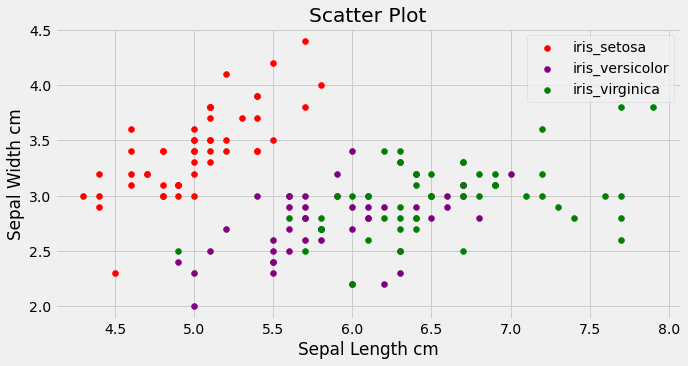

In [19]:
plt.figure(figsize = (10,5))
plt.scatter(df_setosa["SepalLengthCm"], df_setosa["SepalWidthCm"], color = "red", label = "iris_setosa")
plt.scatter(df_versicolor["SepalLengthCm"], df_versicolor["SepalWidthCm"], color = "purple", label = "iris_versicolor")
plt.scatter(df_virginica["SepalLengthCm"], df_virginica["SepalWidthCm"], color = "green", label = "iris_virginica")
plt.xlabel("Sepal Length cm") # x ekseni ismi
plt.ylabel("Sepal Width cm") # y ekseni ismi
plt.title("Scatter Plot")
plt.legend();

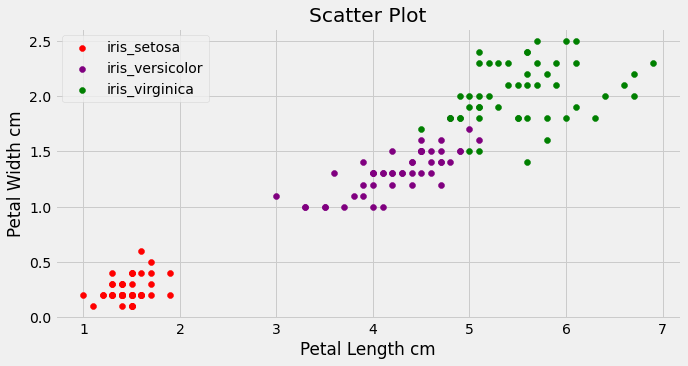

In [20]:
plt.figure(figsize = (10,5))
plt.scatter(df_setosa["PetalLengthCm"], df_setosa["PetalWidthCm"], color = "red", label = "iris_setosa")
plt.scatter(df_versicolor["PetalLengthCm"], df_versicolor["PetalWidthCm"], color = "purple", label = "iris_versicolor")
plt.scatter(df_virginica["PetalLengthCm"], df_virginica["PetalWidthCm"], color = "green", label = "iris_virginica")
plt.xlabel("Petal Length cm") # x ekseni ismi
plt.ylabel("Petal Width cm") # y ekseni ismi
plt.title("Scatter Plot")
plt.legend();

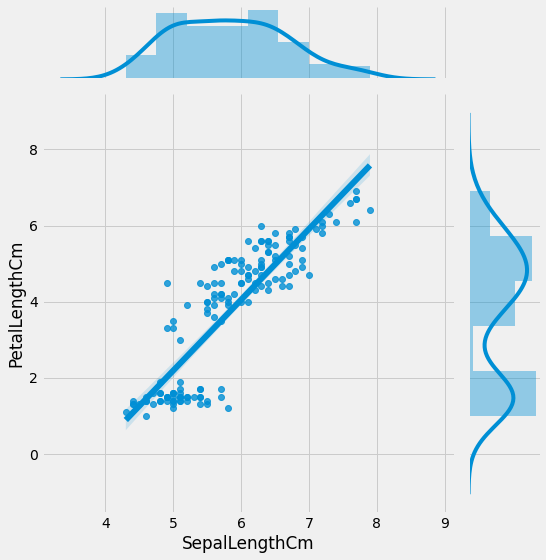

In [21]:
sns.jointplot(x = "SepalLengthCm", y = "PetalLengthCm", data = df, size = 8, kind = "reg");

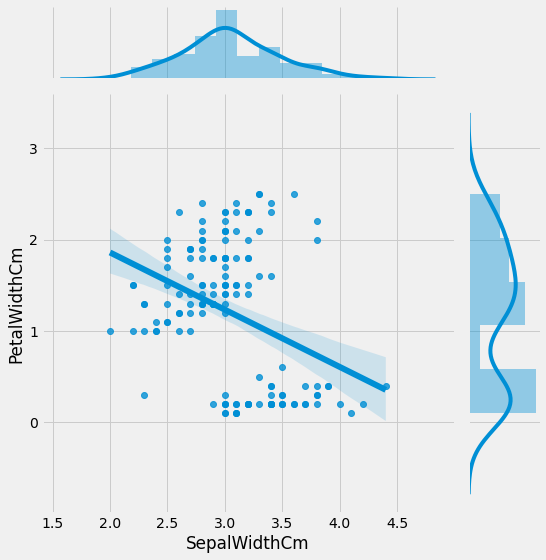

In [22]:
sns.jointplot(x = "SepalWidthCm", y = "PetalWidthCm", data = df, size = 8, kind = "reg");

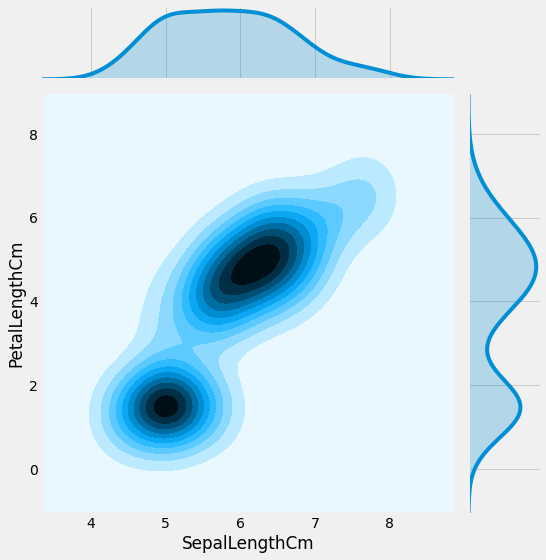

In [23]:
sns.jointplot(x = "SepalLengthCm", y = "PetalLengthCm", data = df, size = 8, kind = "kde");

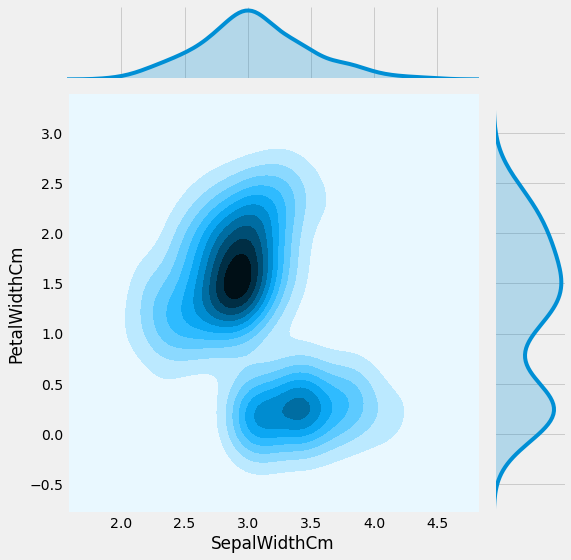

In [24]:
sns.jointplot(x = "SepalWidthCm", y = "PetalWidthCm", data = df, size = 8, kind = "kde");

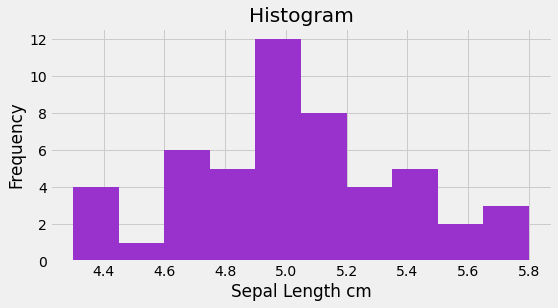

In [25]:
plt.figure(figsize = (8,4))
plt.hist(df_setosa["SepalLengthCm"], bins = 10, color = "darkorchid")
plt.xlabel("Sepal Length cm")
plt.ylabel("Frequency")
plt.title("Histogram");

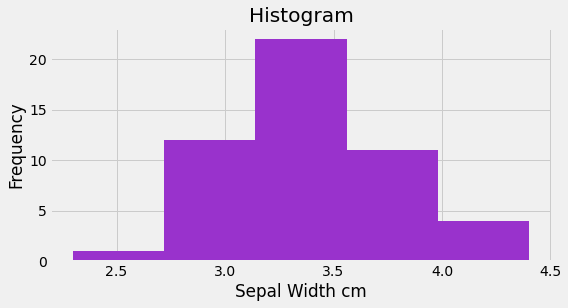

In [26]:
plt.figure(figsize = (8,4))
plt.hist(df_setosa["SepalWidthCm"], bins = 5, color = "darkorchid")
plt.xlabel("Sepal Width cm")
plt.ylabel("Frequency")
plt.title("Histogram");

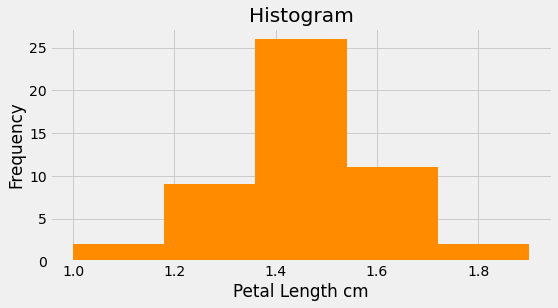

In [27]:
plt.figure(figsize = (8,4))
plt.hist(df_setosa["PetalLengthCm"], bins = 5, color = "darkorange")
plt.xlabel("Petal Length cm")
plt.ylabel("Frequency")
plt.title("Histogram");

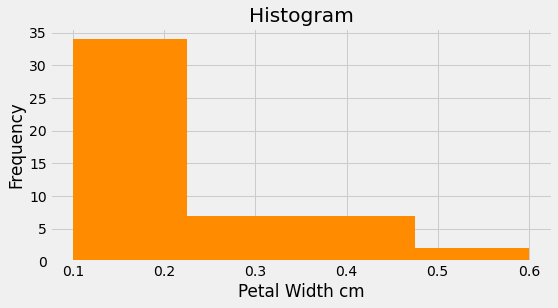

In [28]:
plt.figure(figsize = (8,4))
plt.hist(df_setosa["PetalWidthCm"], bins = 4, color = "darkorange")
plt.xlabel("Petal Width cm")
plt.ylabel("Frequency")
plt.title("Histogram");

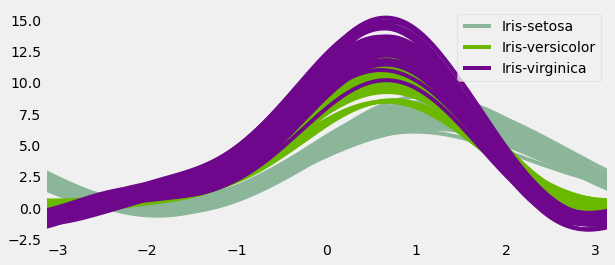

In [29]:
plt.figure(figsize = (9,4))
pdplt.andrews_curves(df.drop("Id", axis = 1), "Species");

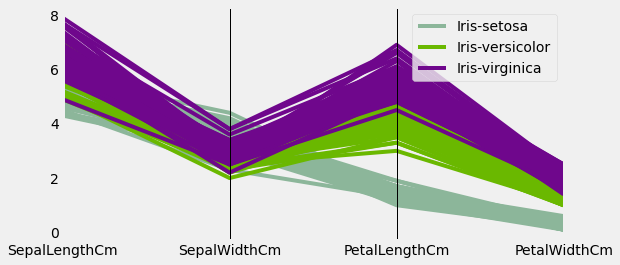

In [30]:
plt.figure(figsize = (8,4))
pdplt.parallel_coordinates(df.drop("Id", axis = 1), "Species");

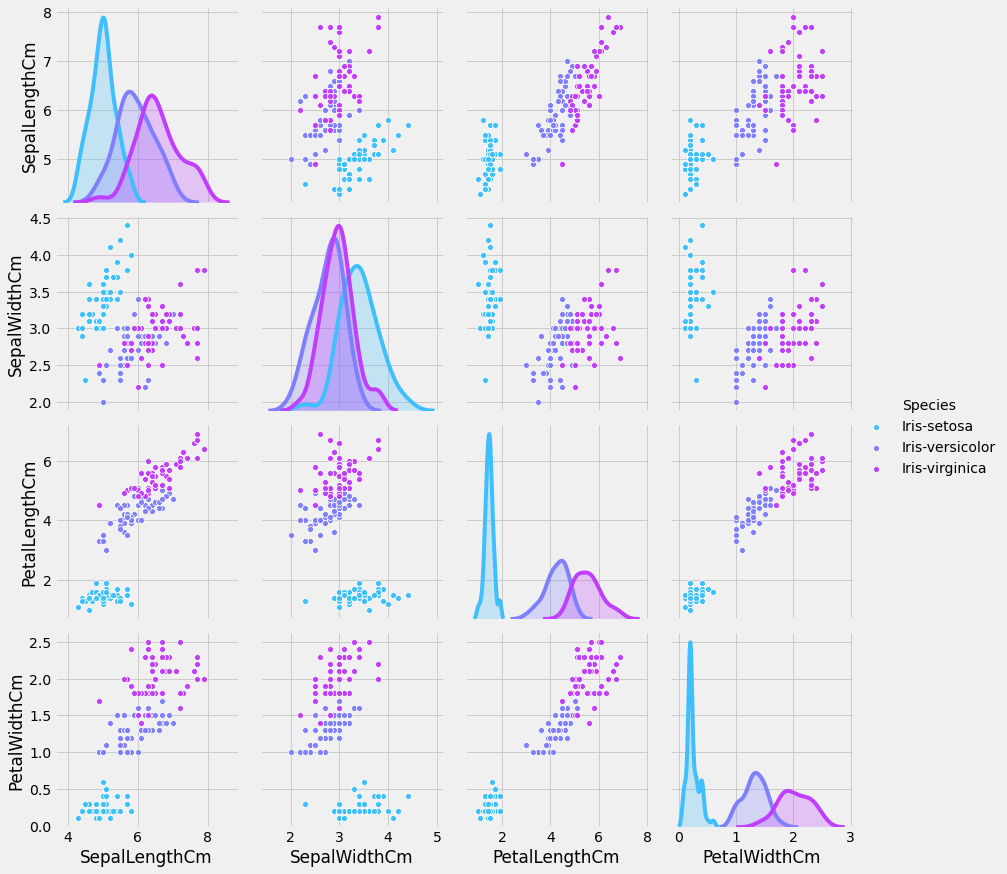

In [31]:
sns.pairplot(df.drop("Id", axis = 1), hue = "Species", palette = "cool", size = 3, diag_kind = "kde");

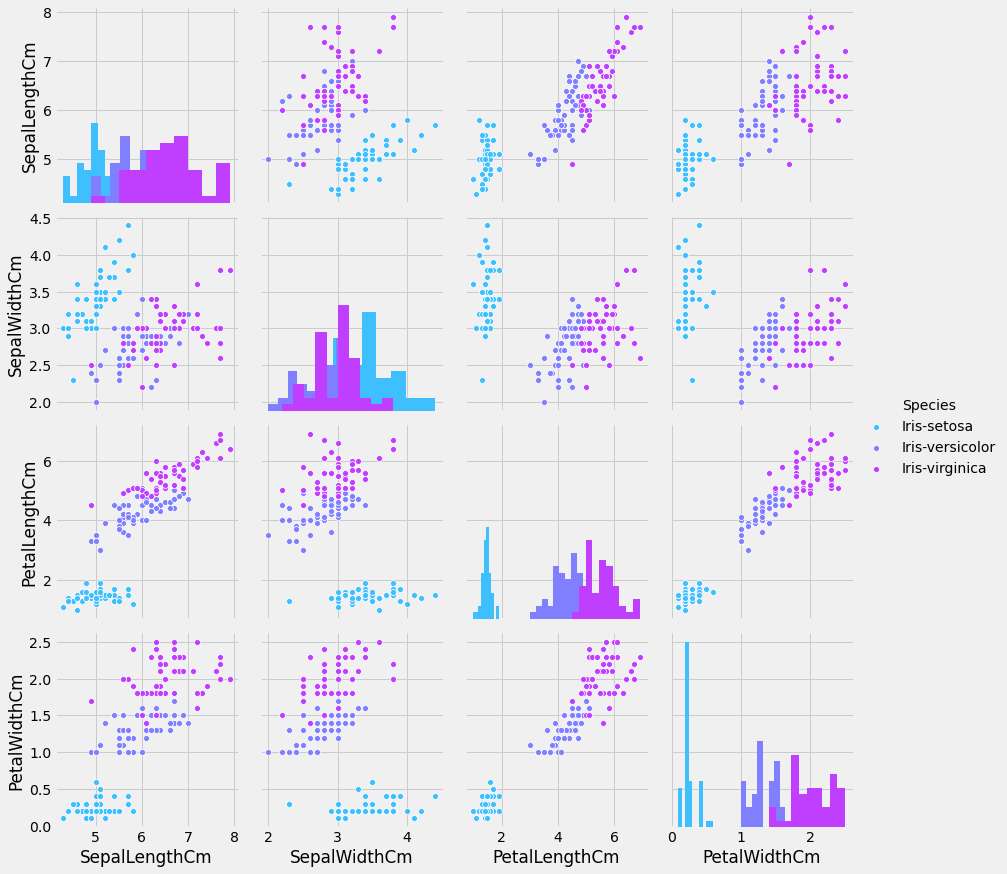

In [32]:
sns.pairplot(df.drop("Id", axis = 1), hue = "Species", palette = "cool", size = 3, diag_kind = "hist");

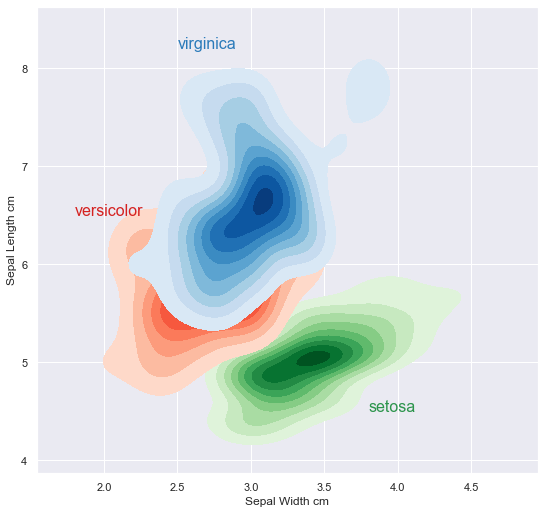

In [33]:
sns.set(style = "darkgrid")

setosa = df.query("Species == 'Iris-setosa'")
versicolor = df.query("Species == 'Iris-versicolor'")
virginica = df.query("Species == 'Iris-virginica'")

f, ax = plt.subplots(figsize = (8,8))

ax = sns.kdeplot(setosa["SepalWidthCm"], setosa["SepalLengthCm"], cmap = "Greens", shade = True, shade_lowest = False)
ax = sns.kdeplot(versicolor["SepalWidthCm"], versicolor["SepalLengthCm"], cmap="Reds",shade = True, shade_lowest = False)
ax = sns.kdeplot(virginica["SepalWidthCm"], virginica["SepalLengthCm"], cmap = "Blues", shade = True, shade_lowest = False)

red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Greens")[-2]

ax.text(1.8, 6.5, "versicolor", size = 16, color = red)
ax.text(2.5, 8.2, "virginica", size = 16, color = blue)
ax.text(3.8, 4.5, "setosa", size = 16, color = green)

plt.xlabel("Sepal Width cm")
plt.ylabel("Sepal Length cm")
plt.savefig('foo.jpeg');

# Veri Ön İşleme

In [34]:
df.drop("Id", axis = 1, inplace = True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
label_encoder = preprocessing.LabelEncoder()
df["Species_Encoded"] = label_encoder.fit_transform(df["Species"]) 
df["Species_Encoded"].unique()

array([0, 1, 2])

In [36]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [37]:
X = df.drop(["Species", "Species_Encoded"], axis = 1)
y = df["Species_Encoded"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

# 1. Lojistik Regresyon

In [38]:
model = LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [39]:
r2_score(y_test, y_pred)

1.0

In [40]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.0

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [42]:
submission = y_test.to_frame()
submission = submission.reset_index()
submission = submission.drop("index", axis = 1)

submission["Class"] = y_pred
submission["Species"] = submission["Class"].map({0 : "Iris-setosa", 1 : "Iris-versicolor", 2 : "Iris-virginica"})
submission["Species_"] = submission["Species_Encoded"] == submission["Class"]

submission.head()

,Species_Encoded,Class,Species,Species_
0,1,1,Iris-versicolor,True
1,1,1,Iris-versicolor,True
2,2,2,Iris-virginica,True
3,1,1,Iris-versicolor,True
4,0,0,Iris-setosa,True


In [43]:
submission["Species_"].value_counts().to_frame()

,Species_
True,45


In [44]:
submission[submission["Species_"] == False]

,Species_Encoded,Class,Species,Species_


In [45]:
cross_val_score(model, X_test, y_test, cv = 10)

array([1.  , 1.  , 1.  , 1.  , 1.  , 0.75, 1.  , 1.  , 1.  , 1.  ])

In [46]:
cross_val_score(model, X_test, y_test, cv = 10).mean()

0.975

# 2. K-En Yakın Komşu

In [47]:
model = KNeighborsClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [48]:
r2_score(y_test, y_pred)

1.0

In [49]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.0

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [51]:
submission = y_test.to_frame()
submission = submission.reset_index()
submission = submission.drop("index", axis = 1)

submission["Class"] = y_pred
submission["Species"] = submission["Class"].map({0 : "Iris-setosa", 1 : "Iris-versicolor", 2 : "Iris-virginica"})
submission["Species_"] = submission["Species_Encoded"] == submission["Class"]

submission.head()

,Species_Encoded,Class,Species,Species_
0,1,1,Iris-versicolor,True
1,1,1,Iris-versicolor,True
2,2,2,Iris-virginica,True
3,1,1,Iris-versicolor,True
4,0,0,Iris-setosa,True


In [52]:
submission["Species_"].value_counts().to_frame()

,Species_
True,45


In [53]:
submission[submission["Species_"] == False]

,Species_Encoded,Class,Species,Species_


In [54]:
cross_val_score(model, X_test, y_test, cv = 10)

array([1.  , 1.  , 1.  , 1.  , 1.  , 0.75, 1.  , 1.  , 1.  , 1.  ])

In [55]:
cross_val_score(model, X_test, y_test, cv = 10).mean()

0.975

# 3. Destek Vektör Makinesi (SVM)

In [56]:
model = SVC().fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [57]:
r2_score(y_test, y_pred)

1.0

In [58]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.0

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [60]:
submission = y_test.to_frame()
submission = submission.reset_index()
submission = submission.drop("index", axis = 1)

submission["Class"] = y_pred
submission["Species"] = submission["Class"].map({0 : "Iris-setosa", 1 : "Iris-versicolor", 2 : "Iris-virginica"})
submission["Species_"] = submission["Species_Encoded"] == submission["Class"]

submission.head()

,Species_Encoded,Class,Species,Species_
0,1,1,Iris-versicolor,True
1,1,1,Iris-versicolor,True
2,2,2,Iris-virginica,True
3,1,1,Iris-versicolor,True
4,0,0,Iris-setosa,True


In [61]:
submission["Species_"].value_counts().to_frame()

,Species_
True,45


In [62]:
submission[submission["Species_"] == False]

,Species_Encoded,Class,Species,Species_


In [63]:
cross_val_score(model, X_test, y_test, cv = 10)

array([1.  , 1.  , 1.  , 1.  , 1.  , 0.75, 1.  , 1.  , 1.  , 1.  ])

In [64]:
cross_val_score(model, X_test, y_test, cv = 10).mean()

0.975

# 4. Yapay Sinir Ağları

In [65]:
model = MLPClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [66]:
r2_score(y_test, y_pred)

1.0

In [67]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.0

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [69]:
submission = y_test.to_frame()
submission = submission.reset_index()
submission = submission.drop("index", axis = 1)

submission["Class"] = y_pred
submission["Species"] = submission["Class"].map({0 : "Iris-setosa", 1 : "Iris-versicolor", 2 : "Iris-virginica"})
submission["Species_"] = submission["Species_Encoded"] == submission["Class"]

submission.head()

,Species_Encoded,Class,Species,Species_
0,1,1,Iris-versicolor,True
1,1,1,Iris-versicolor,True
2,2,2,Iris-virginica,True
3,1,1,Iris-versicolor,True
4,0,0,Iris-setosa,True


In [70]:
submission["Species_"].value_counts().to_frame()

,Species_
True,45


In [71]:
submission[submission["Species_"] == False]

,Species_Encoded,Class,Species,Species_


In [72]:
cross_val_score(model, X_test, y_test, cv = 10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [73]:
cross_val_score(model, X_test, y_test, cv = 10).mean()

0.9800000000000001

# 5. CART (Sınıflandırma ve Regresyon)

In [74]:
model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9777777777777777

In [75]:
r2_score(y_test, y_pred)

0.9629324546952224

In [76]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.14907119849998599

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



In [78]:
submission = y_test.to_frame()
submission = submission.reset_index()
submission = submission.drop("index", axis = 1)

submission["Class"] = y_pred
submission["Species"] = submission["Class"].map({0 : "Iris-setosa", 1 : "Iris-versicolor", 2 : "Iris-virginica"})
submission["Species_"] = submission["Species_Encoded"] == submission["Class"]

submission.head()

,Species_Encoded,Class,Species,Species_
0,1,1,Iris-versicolor,True
1,1,1,Iris-versicolor,True
2,2,2,Iris-virginica,True
3,1,1,Iris-versicolor,True
4,0,0,Iris-setosa,True


In [79]:
submission["Species_"].value_counts().to_frame()

,Species_
True,44
False,1


In [80]:
cross_val_score(model, X_test, y_test, cv = 10)

array([1.  , 1.  , 1.  , 1.  , 1.  , 0.75, 1.  , 1.  , 0.75, 1.  ])

In [81]:
cross_val_score(model, X_test, y_test, cv = 10).mean()

0.93

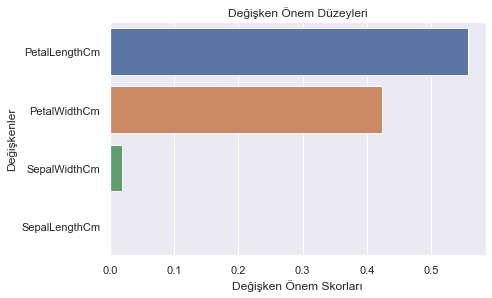

In [82]:
feature_imp = pd.Series(model.feature_importances_, index = X_train.columns).sort_values(ascending = False)
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri");

# 6. Random Forest

In [83]:
model = RandomForestClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [84]:
r2_score(y_test, y_pred)

1.0

In [85]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.0

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [87]:
submission = y_test.to_frame()
submission = submission.reset_index()
submission = submission.drop("index", axis = 1)

submission["Class"] = y_pred
submission["Species"] = submission["Class"].map({0 : "Iris-setosa", 1 : "Iris-versicolor", 2 : "Iris-virginica"})
submission["Species_"] = submission["Species_Encoded"] == submission["Class"]

submission.head()

,Species_Encoded,Class,Species,Species_
0,1,1,Iris-versicolor,True
1,1,1,Iris-versicolor,True
2,2,2,Iris-virginica,True
3,1,1,Iris-versicolor,True
4,0,0,Iris-setosa,True


In [88]:
submission["Species_"].value_counts().to_frame()

,Species_
True,45


In [89]:
cross_val_score(model, X_test, y_test, cv = 10)

array([1. , 1. , 1. , 1. , 1. , 0.5, 1. , 1. , 1. , 1. ])

In [90]:
cross_val_score(model, X_test, y_test, cv = 10).mean()

0.95

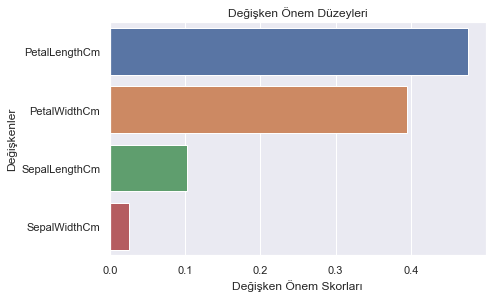

In [91]:
feature_imp = pd.Series(model.feature_importances_, index = X_train.columns).sort_values(ascending = False)
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri");

# 7. Gradient Boosting Machines

In [92]:
model = GradientBoostingClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9777777777777777

In [93]:
r2_score(y_test, y_pred)

0.9629324546952224

In [94]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.14907119849998599

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



In [96]:
submission = y_test.to_frame()
submission = submission.reset_index()
submission = submission.drop("index", axis = 1)

submission["Class"] = y_pred
submission["Species"] = submission["Class"].map({0 : "Iris-setosa", 1 : "Iris-versicolor", 2 : "Iris-virginica"})
submission["Species_"] = submission["Species_Encoded"] == submission["Class"]

submission.head()

,Species_Encoded,Class,Species,Species_
0,1,1,Iris-versicolor,True
1,1,1,Iris-versicolor,True
2,2,2,Iris-virginica,True
3,1,1,Iris-versicolor,True
4,0,0,Iris-setosa,True


In [97]:
submission["Species_"].value_counts().to_frame()

,Species_
True,44
False,1


In [98]:
cross_val_score(model, X_test, y_test, cv = 10)

array([1.  , 1.  , 1.  , 1.  , 0.8 , 0.5 , 1.  , 1.  , 0.75, 1.  ])

In [99]:
cross_val_score(model, X_test, y_test, cv = 10).mean()

0.925

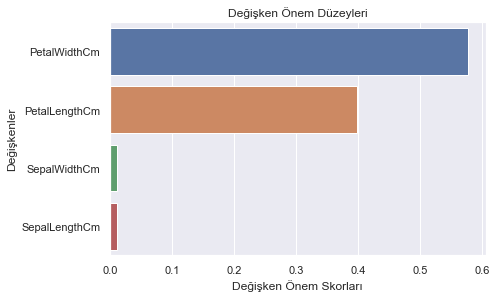

In [100]:
feature_imp = pd.Series(model.feature_importances_, index = X_train.columns).sort_values(ascending = False)
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri");

# 8. XGBoost

In [101]:
model = XGBClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9777777777777777

In [102]:
r2_score(y_test, y_pred)

0.9629324546952224

In [103]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.14907119849998599

In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



In [105]:
submission = y_test.to_frame()
submission = submission.reset_index()
submission = submission.drop("index", axis = 1)

submission["Class"] = y_pred
submission["Species"] = submission["Class"].map({0 : "Iris-setosa", 1 : "Iris-versicolor", 2 : "Iris-virginica"})
submission["Species_"] = submission["Species_Encoded"] == submission["Class"]

submission.head()

,Species_Encoded,Class,Species,Species_
0,1,1,Iris-versicolor,True
1,1,1,Iris-versicolor,True
2,2,2,Iris-virginica,True
3,1,1,Iris-versicolor,True
4,0,0,Iris-setosa,True


In [106]:
submission["Species_"].value_counts().to_frame()

,Species_
True,44
False,1


In [107]:
cross_val_score(model, X_test, y_test, cv = 10)

array([1.  , 1.  , 1.  , 1.  , 1.  , 0.75, 1.  , 1.  , 1.  , 1.  ])

In [108]:
cross_val_score(model, X_test, y_test, cv = 10).mean()

0.975

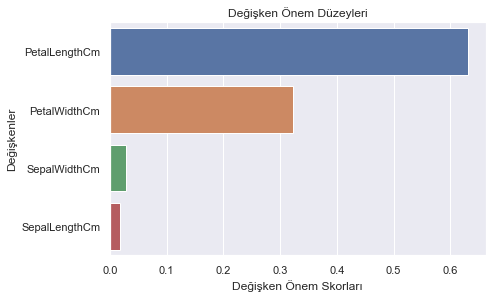

In [109]:
feature_imp = pd.Series(model.feature_importances_, index = X_train.columns).sort_values(ascending = False)
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri");

# 9. Light GBM

In [110]:
model = LGBMClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [111]:
r2_score(y_test, y_pred)

1.0

In [112]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.0

In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [114]:
submission = y_test.to_frame()
submission = submission.reset_index()
submission = submission.drop("index", axis = 1)

submission["Class"] = y_pred
submission["Species"] = submission["Class"].map({0 : "Iris-setosa", 1 : "Iris-versicolor", 2 : "Iris-virginica"})
submission["Species_"] = submission["Species_Encoded"] == submission["Class"]

submission.head()

,Species_Encoded,Class,Species,Species_
0,1,1,Iris-versicolor,True
1,1,1,Iris-versicolor,True
2,2,2,Iris-virginica,True
3,1,1,Iris-versicolor,True
4,0,0,Iris-setosa,True


In [115]:
submission["Species_"].value_counts().to_frame()

,Species_
True,45


In [116]:
cross_val_score(model, X_test, y_test, cv = 10)

array([0.4 , 0.4 , 1.  , 0.6 , 0.4 , 0.25, 0.5 , 1.  , 0.25, 0.25])

In [117]:
cross_val_score(model, X_test, y_test, cv = 10).mean()

0.5050000000000001

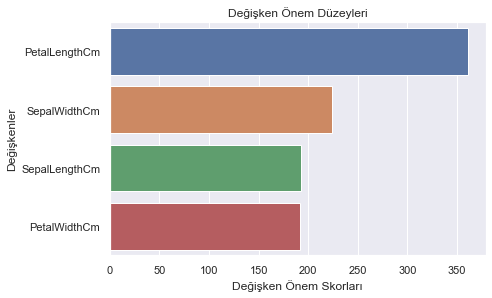

In [118]:
feature_imp = pd.Series(model.feature_importances_, index = X_train.columns).sort_values(ascending = False)
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri");

# 10. CatBoost

In [119]:
model = CatBoostClassifier().fit(X_train, y_train, verbose = False)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9777777777777777

In [120]:
r2_score(y_test, y_pred)

0.9629324546952224

In [121]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.14907119849998599

In [122]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



In [123]:
submission = y_test.to_frame()
submission = submission.reset_index()
submission = submission.drop("index", axis = 1)

submission["Class"] = y_pred
submission["Species"] = submission["Class"].map({0 : "Iris-setosa", 1 : "Iris-versicolor", 2 : "Iris-virginica"})
submission["Species_"] = submission["Species_Encoded"] == submission["Class"]

submission.head()

,Species_Encoded,Class,Species,Species_
0,1,1,Iris-versicolor,True
1,1,1,Iris-versicolor,True
2,2,2,Iris-virginica,True
3,1,1,Iris-versicolor,True
4,0,0,Iris-setosa,True


In [124]:
submission["Species_"].value_counts().to_frame()

,Species_
True,44
False,1


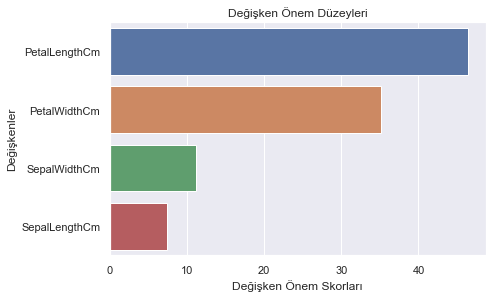

In [125]:
feature_imp = pd.Series(model.feature_importances_, index = X_train.columns).sort_values(ascending = False)
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri");